## GOALS:

### Economic Insight: 

#### Understanding how median household income has changed over time can give us a sense of broader economic trends, such as inflation, economic cycles, and the impact of policy changes.

### Industry Comparison:

#### Comparing these trends to specific industries allows us to see which sectors are outperforming or underperforming the average. This can help identify industries that are more lucrative for workers or that have seen significant growth or decline.



### This script contains the following:

####  Importing  libraries and data

#### Wrangling and cleaning time-series data

#### Time series analysis: decomposition

#### Testing for stationarity

#### Stationarizing the Federal Reserve Economic Data (differencing)

In [9]:

import nasdaqdatalink

In [10]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [11]:
# Configure API key 

quandl.ApiConfig.api_key = 'Y5yfqBcCk-4zDBYWqYZk'

In [12]:
income_data = quandl.get('FRED/MEHOINUSA672N')

In [13]:
income_data.head()

,Value
Date,
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0


In [14]:
income_data.shape

(37, 1)

In [15]:
type(data)

pandas.core.frame.DataFrame

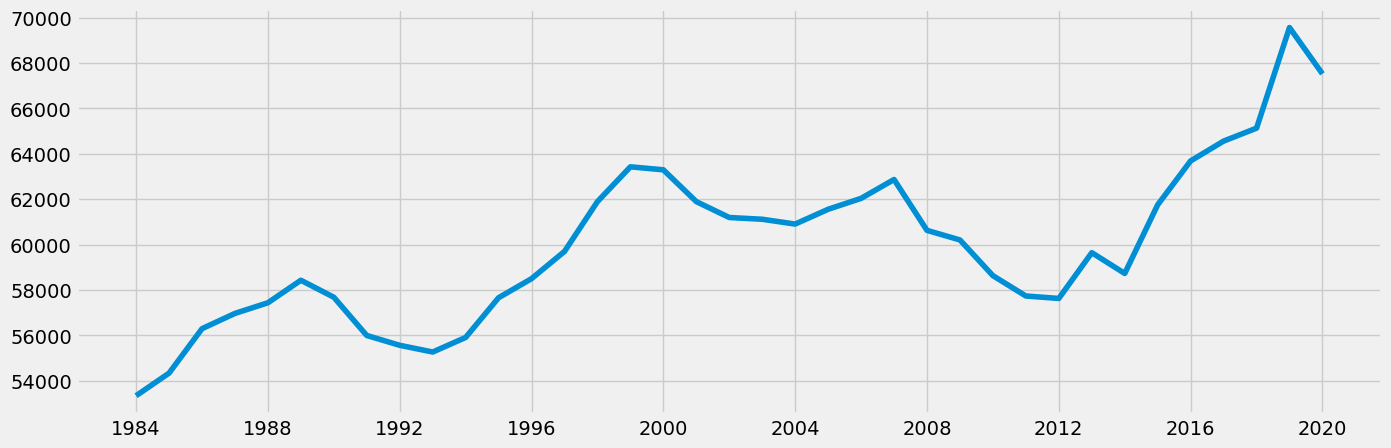

In [17]:
# Plotting the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(income_data)

### Time - Series Data wrangling,subsetting and cleaning 

In [18]:
# Resetting index we can use the "Date" column as a filter

income_data_2 = income_data.reset_index()

In [19]:
income_data_2.head()

,Date,Value
0,1984-01-01,53337.0
1,1985-01-01,54334.0
2,1986-01-01,56291.0
3,1987-01-01,56964.0
4,1988-01-01,57433.0


#### No subsetting needed

In [20]:
# Setting the "Date" column as the index

from datetime import datetime

income_data_2['datetime'] = pd.to_datetime(income_data_2['Date']) # Create a datetime column from "Date.""
income_data_2 = income_data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
income_data_2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
income_data_2.head()

,Value
datetime,
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0


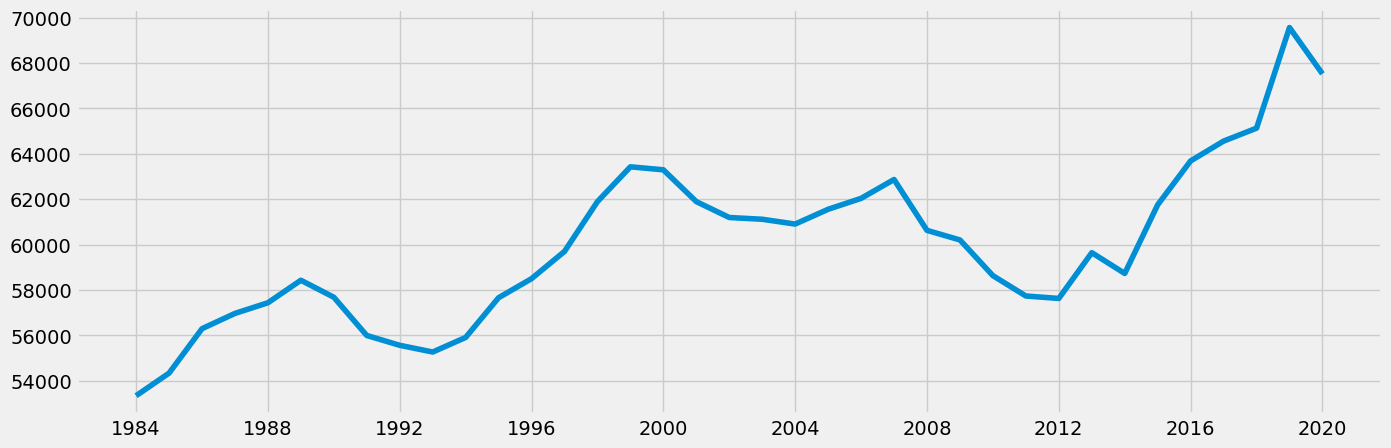

In [21]:
# Plotting the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(income_data_2)

In [22]:
# Check for missing values 

income_data_2.isnull().sum() 

Value    0
dtype: int64

In [23]:
# Check for duplicates

dups = income_data_2.duplicated()
dups.sum()

0

In [24]:
# Decomposing the time series using an multiplicative model

decomposition = sm.tsa.seasonal_decompose(income_data_2, model='multiplicative')

In [25]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

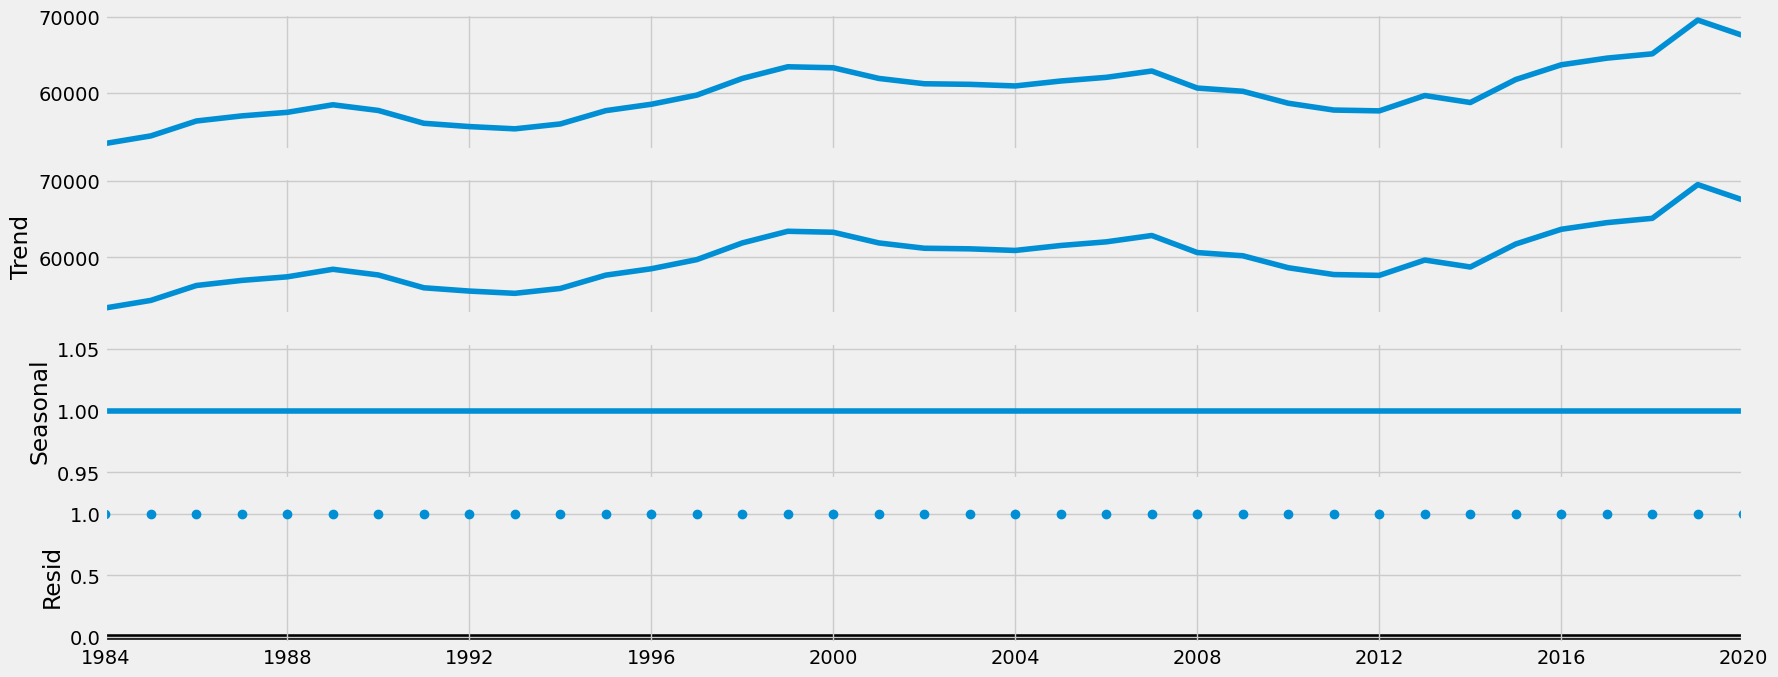

In [26]:
# Plot the separate components

decomposition.plot()
plt.show()

### Note: 
WE are working with yearly data and WE SEE see a horizontal line in the seasonal component of the decomposition plot, it suggests that there is no annual seasonality. This is expected because seasonality refers to fluctuations that occur at specific regular intervals within the data, such as monthly or quarterly. With yearly data, we  would not typically expect to find intra-year seasonal patterns since each data point represents an aggregate over the entire year.

## Stationary testing

In [27]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(income_data_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.066512
p-value                         0.728240
Number of Lags Used             7.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


#### Can't deny null hypothesis

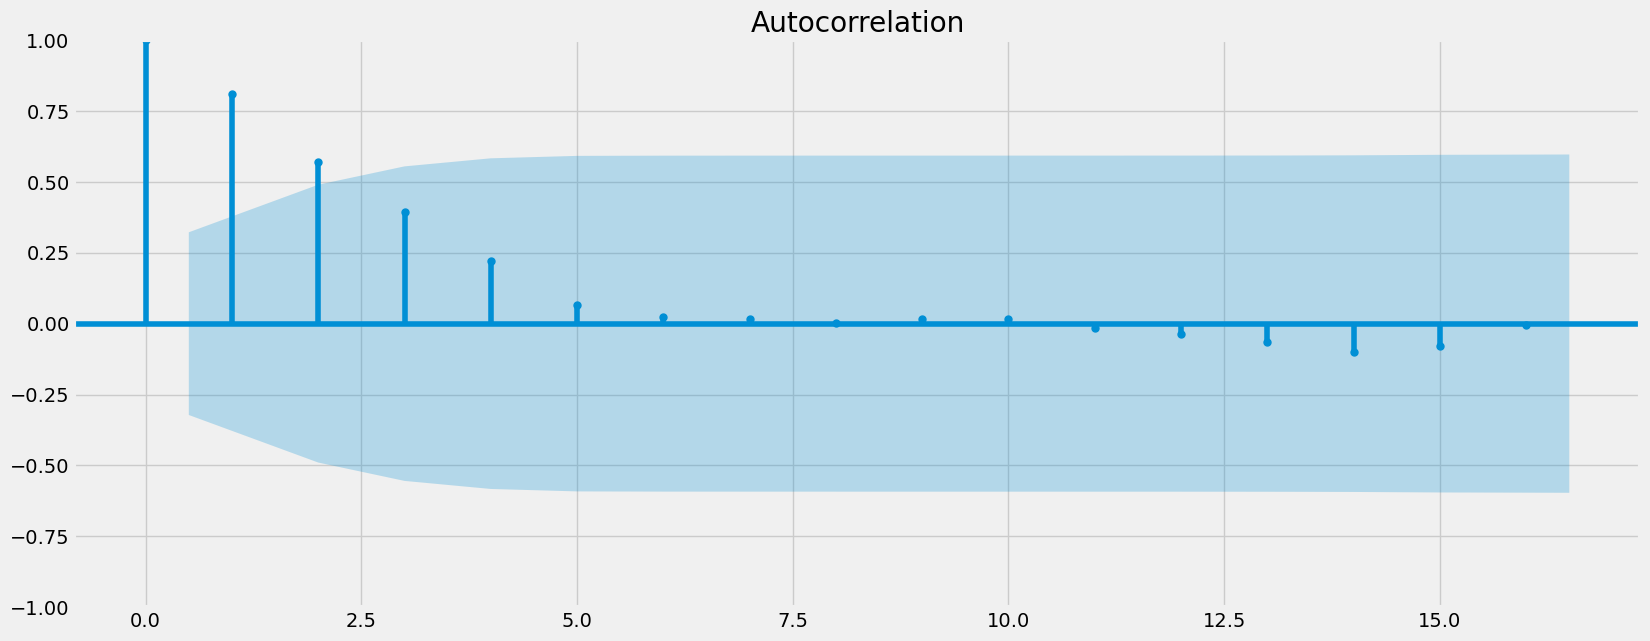

In [28]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(income_data_2)
plt.show()

### Stationarizing the Data (differencing)

In [30]:
data_diff = income_data_2 - income_data_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [31]:
data_diff.dropna(inplace = True) 

In [32]:
data_diff.head()

,Value
datetime,
1985-01-01,997.0
1986-01-01,1957.0
1987-01-01,673.0
1988-01-01,469.0
1989-01-01,992.0


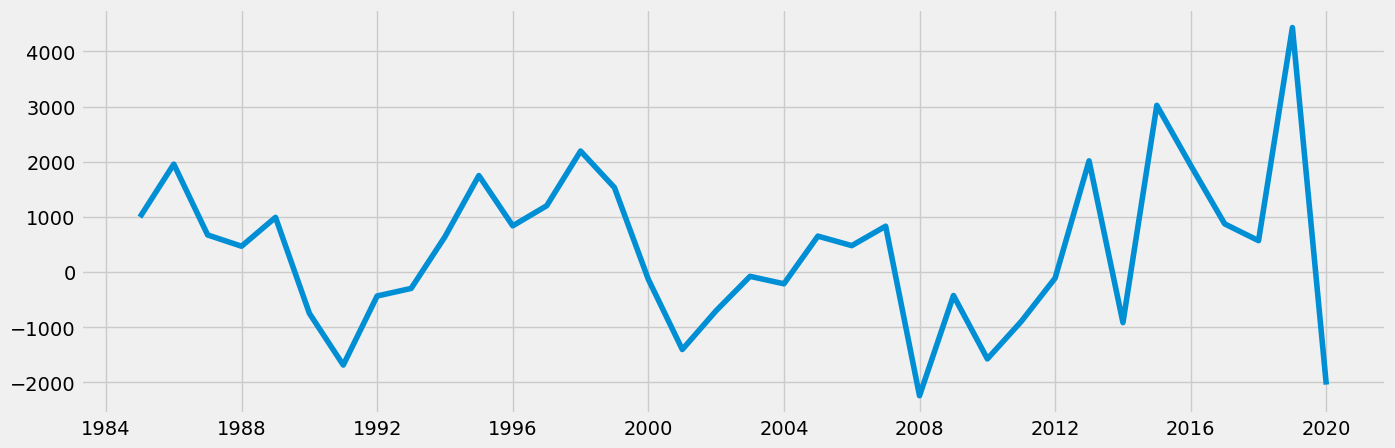

In [33]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.293123
p-value                         0.174196
Number of Lags Used             6.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


#### NOTE: 

#### Test Statistic: The value of -2.293123 is higher than the critical values at the 1%, 5%, and 10% levels, which means that we still fail to reject the null hypothesis for non-stationarity at conventional significance levels.

#### p-value: At 0.174196, the p-value is greater than the typical alpha level of 0.05, indicating that the null hypothesis cannot be rejected at the 5% significance level. This further suggests that the time series is likely non-stationary even after differencing.

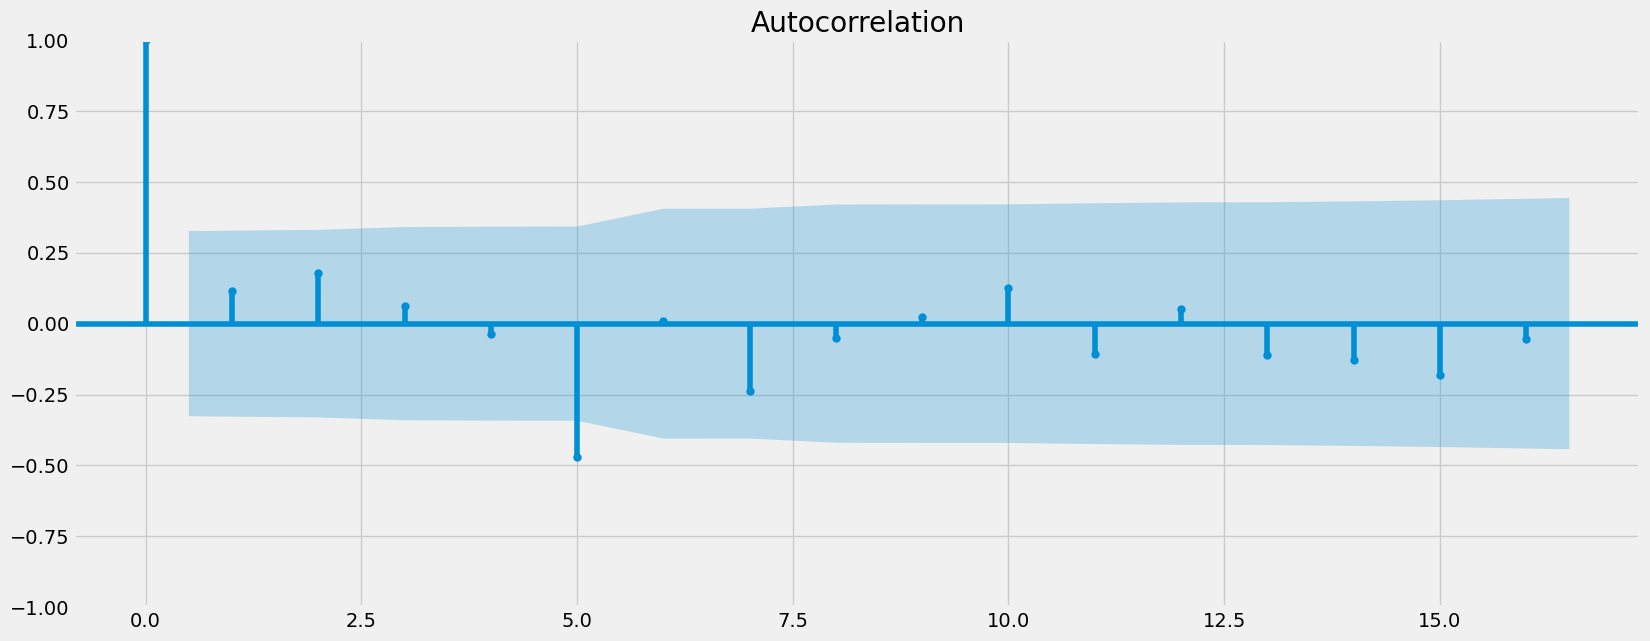

In [36]:
plot_acf(data_diff)
plt.show()

### Performing a second round of differencing

In [37]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [38]:
data_diff_2.dropna(inplace = True) 

In [40]:
data_diff_2.head()

,Value
datetime,
1986-01-01,960.0
1987-01-01,-1284.0
1988-01-01,-204.0
1989-01-01,523.0
1990-01-01,-1740.0


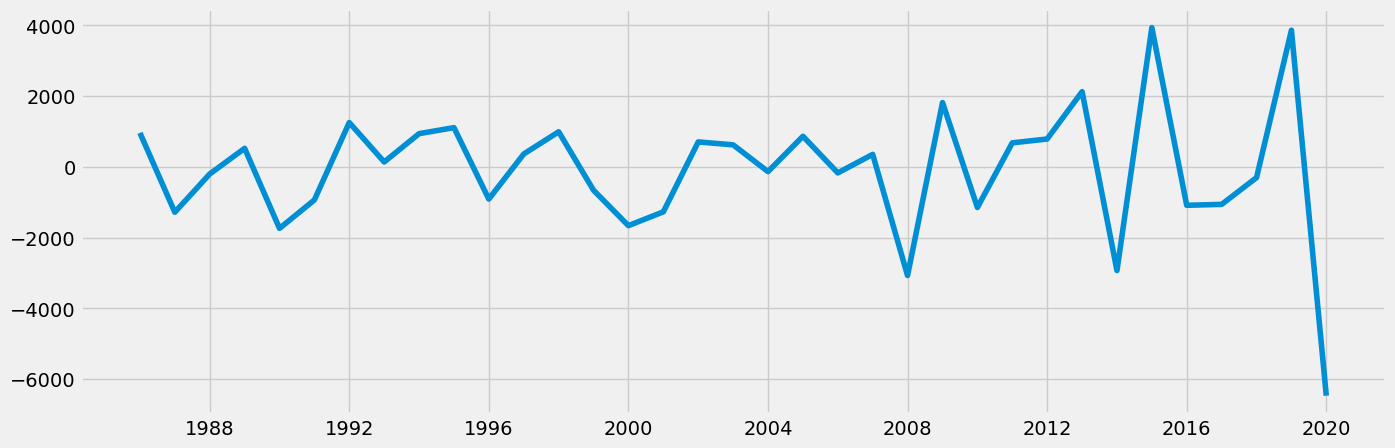

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [42]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.651639
p-value                         0.000104
Number of Lags Used             4.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


#### NOTES

#### Test Statistic: The value of -4.651639 is lower than the critical values at the 1%, 5%, and 10% levels. This means we can reject the null hypothesis of non-stationarity.

#### p-value: A p-value of 0.000104 is below the conventional alpha level of 0.05, which provides strong evidence against the null hypothesis. Hence, the series can be considered stationary.

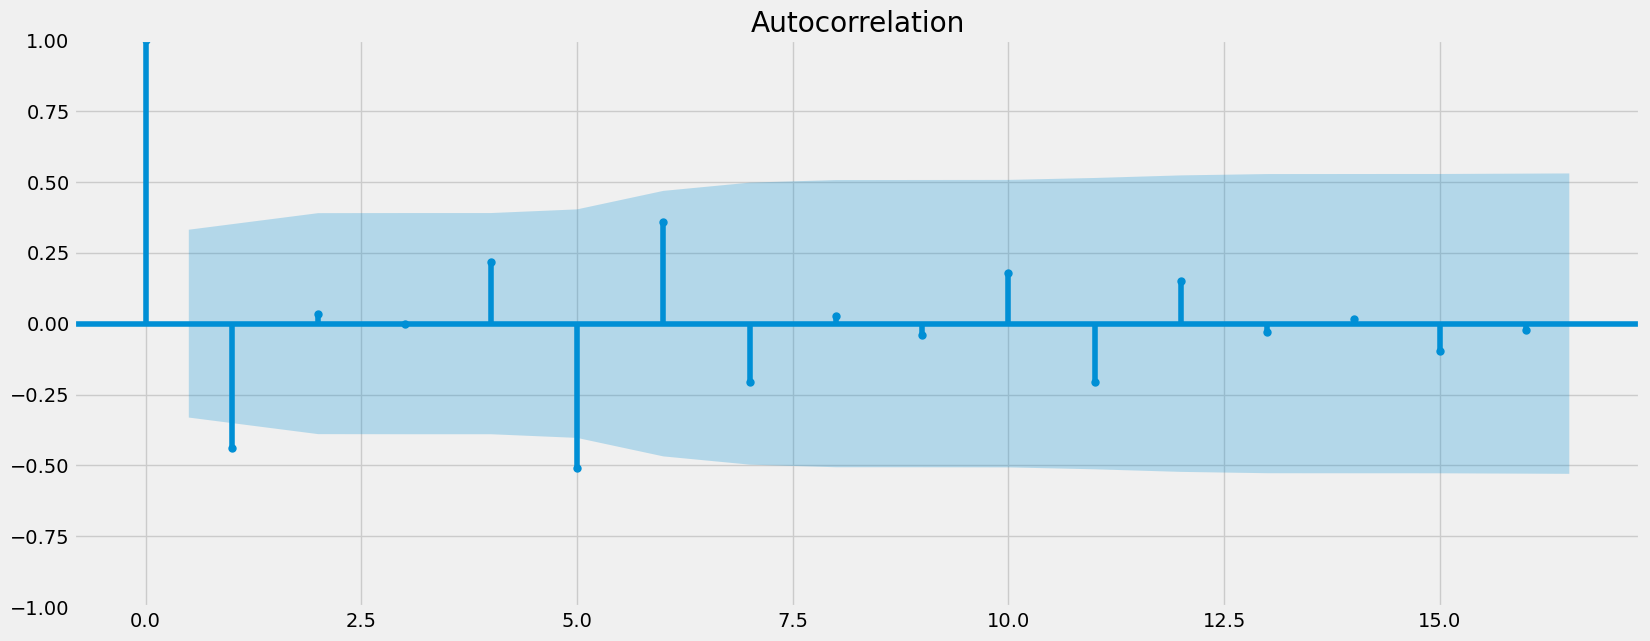

In [43]:
plot_acf(data_diff_2)
plt.show()